In [1]:
!pip install caer canaro

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.5/809.5 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 76.4 MB/s eta 0:00:00


In [2]:
import os
import caer
import canaro
import cv2 as cv
import gc
import matplotlib.pyplot as plt
import numpy as np

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
IMG_SIZE=(80,80)
channels=1 #grayscale

In [4]:
char_path=r'/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset'

In [5]:
char_dict={}
for char in os.listdir(char_path):
    char_dict[char]=len(os.listdir(os.path.join(char_path,char))) #how many images are in each character folder
char_dict=caer.sort_dict(char_dict,descending=True)
char_dict

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('simpsons_dataset', 42),
 ('agnes_skinner', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('fat_tony', 27),
 (

In [6]:
characters=list()
count=0
for i in char_dict:
    characters.append(i[0])
    count+=1
    if count>=10:
        break
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

In [7]:
#Create train data
train=caer.preprocess_from_dir(char_path,characters,channels=channels,IMG_SIZE=IMG_SIZE,isShuffle=True)

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] At 1000 files
[INFO] At 2000 files
[INFO] 2246 files found in 3.5162267684936523s
[INFO] At 1000 files
[INFO] 1454 files found in 0.8451704978942871s
[INFO] At 1000 files
[INFO] 1452 files found in 0.8485133647918701s
[INFO] At 1000 files
[INFO] 1354 files found in 0.7144308090209961s
[INFO] At 1000 files
[INFO] 1342 files found in 0.6481683254241943s
[INFO] At 1000 files
[INFO] 1291 files found in 0.4853856563568115s
[INFO] At 1000 files
[INFO] 1206 files found in 0.1817784309387207s
[INFO] At 1000 files
[INFO] 1194 files found in 0.16763830184936523s
[INFO] At 1000 files
[INFO] 1193 files found in 0.14591550827026367s
[INFO] At 1000 files
[INFO] 1079 files found in 0.004395484924316406s
----------------------------------------------
[INFO] 13811 files preprocessed! Took 2m 39s


In [8]:
len(train)

13811

In [9]:
train.shape #contains image and its corresponding label
train[0][1]

3

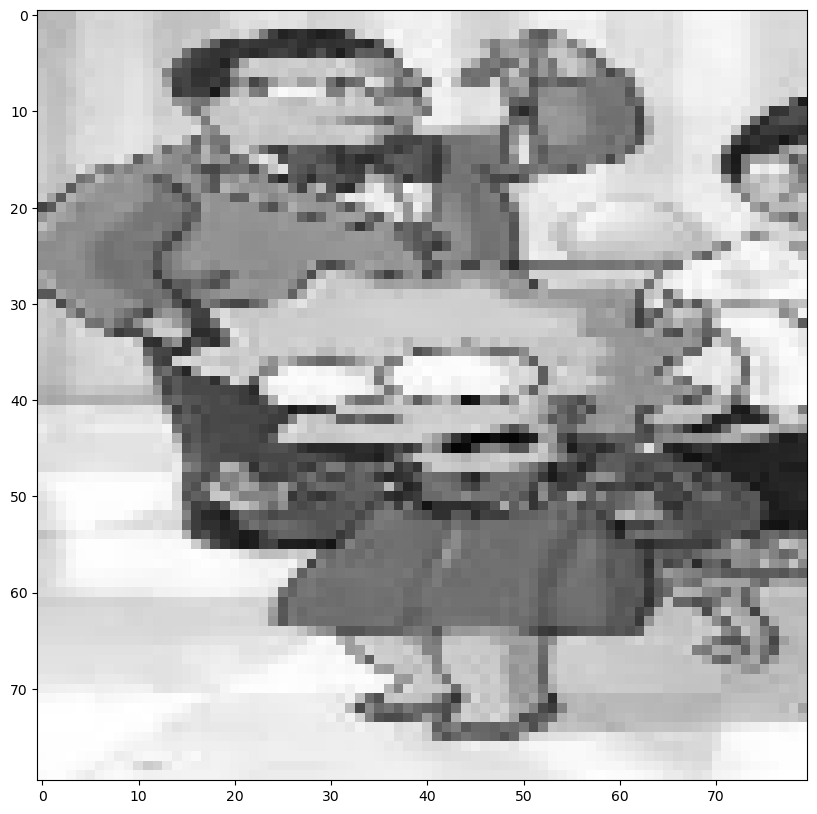

In [10]:
plt.figure(figsize=(20,10))
plt.imshow(train[0][0],cmap="gray")
plt.show()

In [11]:
featureSet,labels=caer.sep_train(train,IMG_SIZE=IMG_SIZE) 

In [12]:
featureSet.shape

(13811, 80, 80, 1)

In [13]:
labels.shape

(13811,)

In [14]:
#Normalizing the data
featureSet=caer.normalize(featureSet)

In [15]:
from tensorflow import keras
from keras.utils import to_categorical
labels=to_categorical(labels,len(characters))

In [16]:
labels.shape

(13811, 10)

In [17]:
x_train,x_val,y_train,y_val=caer.train_val_split(featureSet,labels,val_ratio=.2)

In [18]:
#deleting unnecessary variables
del train
del featureSet 
del labels
gc.collect()

0

In [19]:
BATCH_SIZE=32
EPOCHS=10

In [20]:
#Image data generator
datagen=canaro.generators.imageDataGenerator()
train_gen=datagen.flow(x_train,y_train,batch_size=BATCH_SIZE)
x_train.shape
y_train.shape
train_gen
val_gen=datagen.flow(x_val,y_val,batch_size=BATCH_SIZE)

In [21]:
for data,label in train_gen:
    print(data.shape)
    print(label.shape[:2])
    break

(32, 80, 80, 1)
(32, 10)


In [22]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout

In [23]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(80,80,1),padding='same',activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 80, 80, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 78, 78, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 39, 39, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 39, 39, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 39, 39, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 37, 37, 64)        36928     
                                                        

In [24]:
# from tensorflow.keras.callbacks import EarlyStopping
# earlystop = EarlyStopping(monitor = 'val_accuracy',patience = 3,
#                           verbose = 1,
#                           mode='max',
#                           restore_best_weights = True)
# check='./Model.h5'
# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath=check,
#     save_weights_only=False,
#     monitor='val_accuracy',
#     mode='max',
#     save_best_only=True)
# callback=[earlystop,model_checkpoint_callback]

# model.fit(train_gen,validation_data=val_gen,epochs=10)